# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [2]:
df = pd.read_table('data/mini.csv', sep=',')
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   user_id                            10000 non-null  object 
 1   subscription_duration              10000 non-null  int64  
 2   recent_login_time                  10000 non-null  int64  
 3   average_login_time                 10000 non-null  float64
 4   average_time_per_learning_session  10000 non-null  float64
 5   monthly_active_learning_days       10000 non-null  int64  
 6   total_completed_courses            10000 non-null  int64  
 7   recent_learning_achievement        10000 non-null  float64
 8   abandoned_learning_sessions        10000 non-null  int64  
 9   community_engagement_level         10000 non-null  int64  
 10  preferred_difficulty_level         10000 non-null  object 
 11  subscription_type                  10000 non-null  obje

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,10000,10000,b919c29d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subscription_duration,10000.0,NaN,NaN,NaN,11.8974,6.600896,1.0,6.0,12.0,18.0,23.0
recent_login_time,10000.0,NaN,NaN,NaN,15.0132,8.362573,1.0,8.0,15.0,22.0,29.0
average_login_time,10000.0,NaN,NaN,NaN,14.994076,3.001869,2.366189,13.025597,14.979228,16.99534,26.99849
average_time_per_learning_session,10000.0,NaN,NaN,NaN,54.91772,56.02431,0.011515,15.276611,37.578818,75.5842,503.372616
monthly_active_learning_days,10000.0,NaN,NaN,NaN,12.5454,6.932239,1.0,7.0,13.0,19.0,24.0
total_completed_courses,10000.0,NaN,NaN,NaN,12.2275,3.634125,1.0,10.0,12.0,15.0,27.0
recent_learning_achievement,10000.0,NaN,NaN,NaN,75.029513,9.968529,35.941755,68.278054,75.126061,81.718976,112.643828
abandoned_learning_sessions,10000.0,NaN,NaN,NaN,3.0436,1.755052,0.0,2.0,3.0,4.0,12.0
community_engagement_level,10000.0,NaN,NaN,NaN,3.8861,1.262175,1.0,3.0,4.0,5.0,5.0


## 서비스 현황

### 1. 결제 패턴

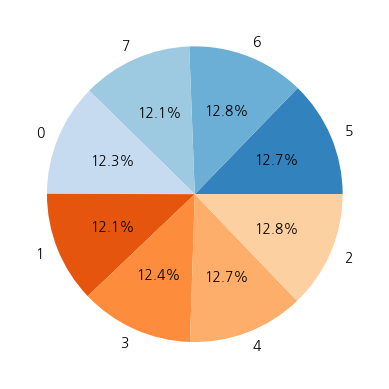

In [5]:
label = df.payment_pattern.unique()
cmap = plt.get_cmap('tab20c')
colors = cmap(np.arange(len(label)) % cmap.N)
plt.pie(df.groupby('payment_pattern')['user_id'].count(), labels=label,autopct='%1.1f%%', colors=colors)
plt.show()

### 2. 일반적인 로그인 시간

In [6]:
df['average_login_time']=pd.to_datetime(df['average_login_time'], unit='h')
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,1970-01-01 14:56:46.185614361,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,1970-01-01 18:27:11.605443747,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,1970-01-01 16:11:42.820696465,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,1970-01-01 17:37:43.160702646,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,1970-01-01 21:23:26.361159974,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,1970-01-01 14:43:39.444596831,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,1970-01-01 19:22:26.595827545,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,1970-01-01 18:14:27.520275496,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,1970-01-01 18:47:01.680014557,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [7]:
df['average_login_time']=df['average_login_time'].dt.hour
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [8]:
hour_data=df.groupby('average_login_time')['user_id'].count()
hour_data

average_login_time
0       13
1        5
2        4
3        4
4        5
5        5
6       25
7       68
8      126
9      246
10     429
11     648
12     918
13    1216
14    1343
15    1310
16    1162
17     900
18     689
19     445
20     236
21     124
22      55
23      24
Name: user_id, dtype: int64

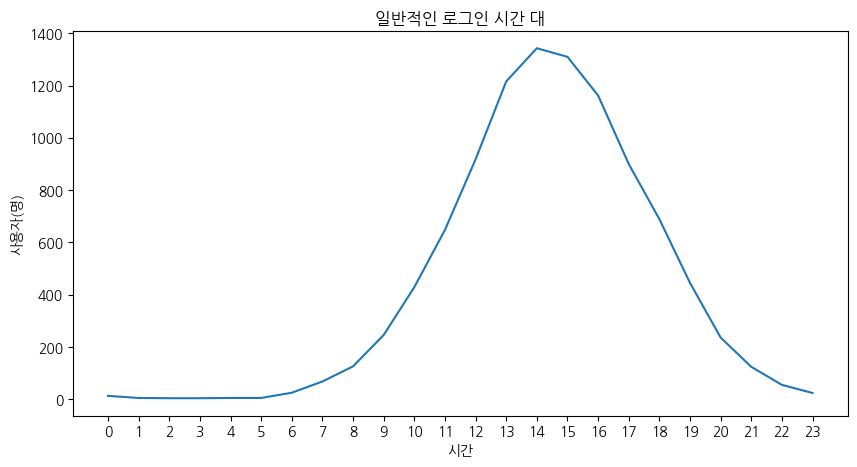

In [9]:
plt.figure(figsize=(10,5))

plt.plot(hour_data.index, hour_data.values)

plt.title('일반적인 로그인 시간 대')

plt.xlabel('시간')

plt.ylabel('사용자(명)')

plt.xticks(np.arange(24))

plt.show()

### 3. 월간 활동적인 학습 일수

In [10]:
monthly_learnig_days = df.groupby('monthly_active_learning_days')['user_id'].count()
monthly_learnig_days

monthly_active_learning_days
1     395
2     397
3     412
4     446
5     423
6     406
7     422
8     452
9     415
10    435
11    368
12    423
13    398
14    414
15    420
16    389
17    433
18    401
19    428
20    447
21    416
22    405
23    396
24    459
Name: user_id, dtype: int64

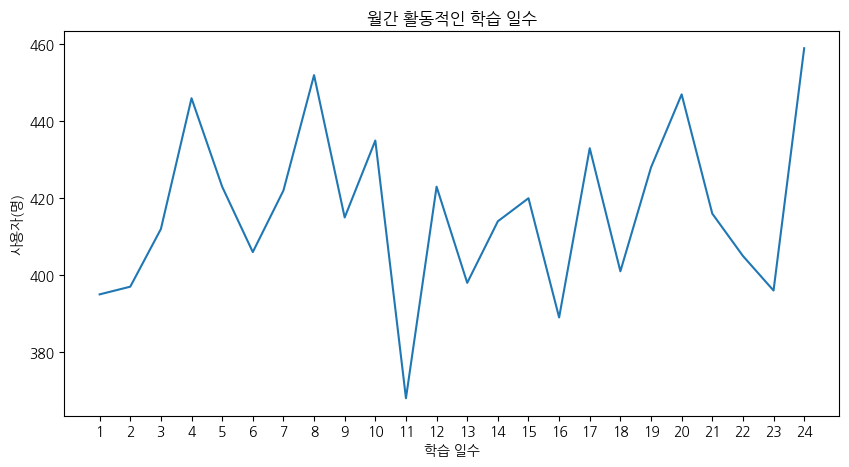

In [121]:
plt.figure(figsize=(10,5))

plt.plot(monthly_learnig_days.index, monthly_learnig_days.values)

plt.title('월간 활동적인 학습 일수')

plt.xlabel('학습 일수')

plt.ylabel('사용자(명)')

plt.xticks(np.arange(1, 25))

plt.show()

### 4. 난이도, 구독 타입 현황

In [12]:
import seaborn as sns

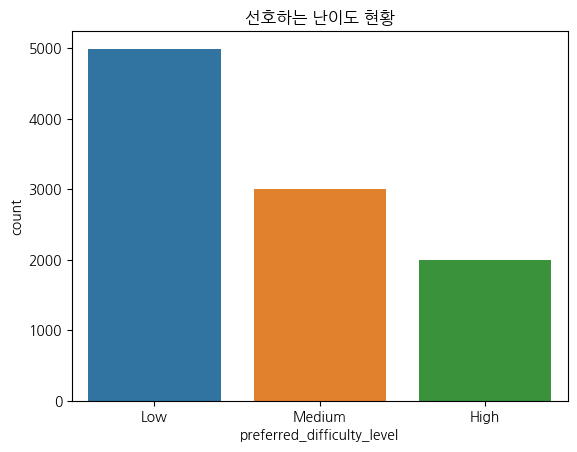

In [13]:
sns.countplot(x='preferred_difficulty_level', data=df)
plt.title("선호하는 난이도 현황")
plt.show()

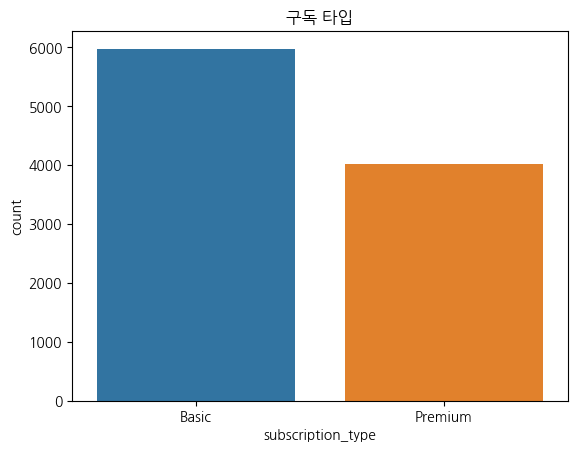

In [14]:
sns.countplot(x='subscription_type', data=df)
plt.title("구독 타입")
plt.show()

### 5. 난이도 별, 구독 타입 별 총 완료한 코스 수

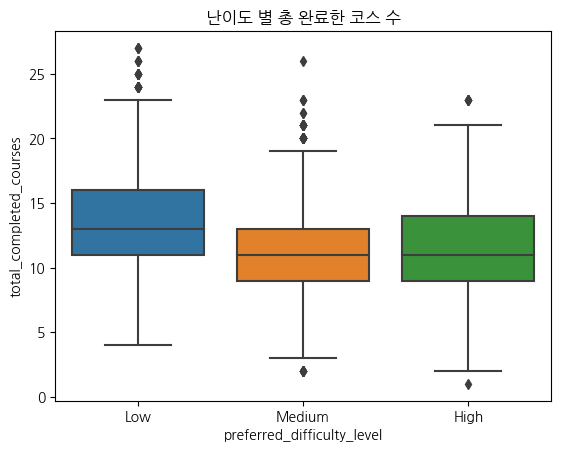

In [15]:
sns.boxplot(x="preferred_difficulty_level", y="total_completed_courses",data=df)
plt.title("난이도 별 총 완료한 코스 수")
plt.show()

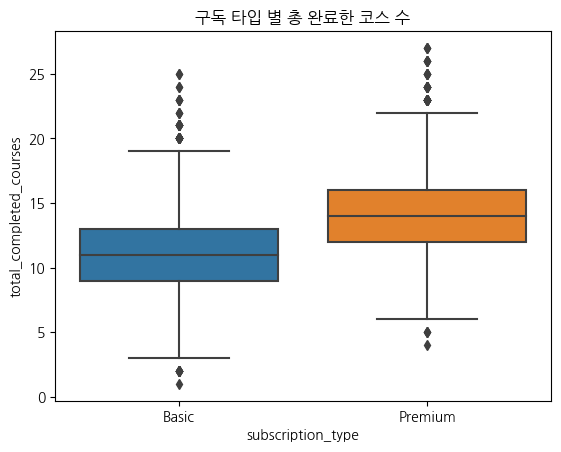

In [16]:
sns.boxplot(x="subscription_type", y="total_completed_courses",data=df)
plt.title("구독 타입 별 총 완료한 코스 수")
plt.show()

## 가설 세우기

### 1. 지난 3개월 중 2회 이상 결제하고 마지막 달 결제한 사람은 구독을 연장할 것이다.

In [17]:
df_last_pay = df[(df["payment_pattern"] ==3)|(df["payment_pattern"] ==5)|(df["payment_pattern"] ==7)]
df_last_pay

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
2,b9f171ae,22,1,16,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
5,b7586b82,4,4,17,34.034189,21,8,74.371028,2,4,High,Basic,5,7,0
9,0eac44aa,22,8,10,18.696273,5,10,57.646992,5,4,Medium,Basic,4,7,1
11,b8696d56,5,28,18,117.134599,9,9,97.786237,6,3,Medium,Premium,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,039902b7,5,23,10,21.655545,9,9,57.110845,1,2,Low,Basic,1,3,0
9990,365dc677,22,20,16,33.315978,11,17,55.935378,2,5,Low,Premium,2,5,1
9992,5bb80449,19,4,13,100.630340,1,12,82.762566,5,5,Low,Premium,1,7,1
9996,24588752,10,11,19,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1


In [103]:
df_last_pay.groupby('target').count()/len(df_last_pay)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
target,,,,,,,,,,,,,,
0,0.384861,0.384861,0.384861,0.384861,0.384861,0.384861,0.384861,0.384861,0.384861,0.384861,0.384861,0.384861,0.384861,0.384861
1,0.615139,0.615139,0.615139,0.615139,0.615139,0.615139,0.615139,0.615139,0.615139,0.615139,0.615139,0.615139,0.615139,0.615139


In [104]:
df_not_pay = df[(df["payment_pattern"] ==0)|(df["payment_pattern"] ==1)|(df["payment_pattern"] ==2)|(df["payment_pattern"] ==4)|(df["payment_pattern"] ==6)]
df_not_pay.groupby('target').count()/len(df_not_pay)

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern
target,,,,,,,,,,,,,,
0,0.377241,0.377241,0.377241,0.377241,0.377241,0.377241,0.377241,0.377241,0.377241,0.377241,0.377241,0.377241,0.377241,0.377241
1,0.622759,0.622759,0.622759,0.622759,0.622759,0.622759,0.622759,0.622759,0.622759,0.622759,0.622759,0.622759,0.622759,0.622759


In [20]:
len(df_not_pay)

6248

In [21]:
df_pay = df[["payment_pattern","target"]]
df_pay

,payment_pattern,target
0,5,0
1,6,1
2,7,1
3,0,1
4,0,1
...,...,...
9995,1,1
9996,7,1
9997,6,1
9998,0,1


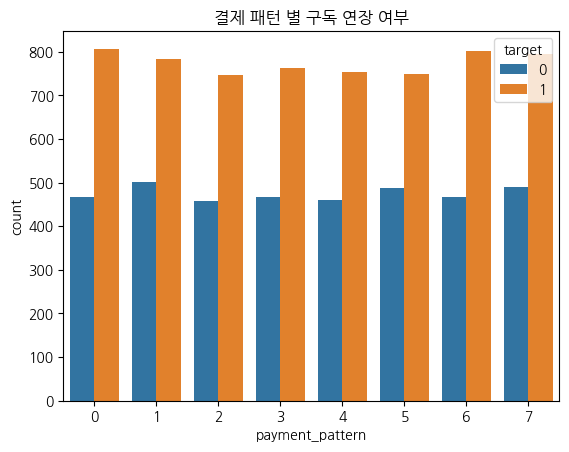

In [22]:
sns.countplot(x="payment_pattern", hue="target", data=df)
plt.title("결제 패턴 별 구독 연장 여부")
plt.show() #딱히 큰 차이 없음. 가설 기각

In [23]:
df.groupby("target")["user_id"].count()

target
0    3801
1    6199
Name: user_id, dtype: int64

### 2. 학습 성취도가 높을 수록 다음 달 구독 연장할 것이다.

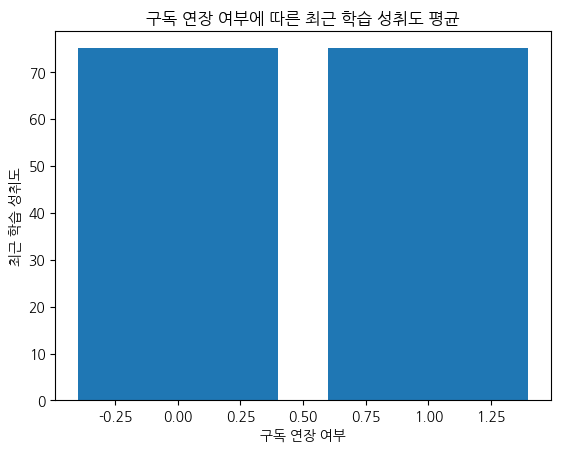

In [42]:
plt.bar(df.target,df["recent_learning_achievement"].mean() )
plt.title('구독 연장 여부에 따른 최근 학습 성취도 평균')
plt.xlabel('구독 연장 여부')
plt.ylabel('최근 학습 성취도')

plt.show()

In [25]:
df_means = df.groupby("target")["recent_learning_achievement"].mean()
df_means

target
0    75.000310
1    75.047419
Name: recent_learning_achievement, dtype: float64

In [124]:
df_medians = df.groupby("target")["recent_learning_achievement"].median()
df_medians

target
0    74.981448
1    75.199591
Name: recent_learning_achievement, dtype: float64

In [106]:
df_stds = df.groupby("target")["recent_learning_achievement"].std()
df_stds

target
0     9.873574
1    10.027058
Name: recent_learning_achievement, dtype: float64

In [32]:
df_achievement = pd.DataFrame(df_means,df.target)
df_achievement

,recent_learning_achievement
target,
0,75.000310
1,75.047419
1,75.047419
1,75.047419
1,75.047419
...,...
1,75.047419
1,75.047419
1,75.047419


(array([  10.,   74.,  470., 1428., 2671., 2928., 1722.,  562.,  124.,
          11.]),
 array([ 35.94175494,  43.6119622 ,  51.28216946,  58.95237671,
         66.62258397,  74.29279123,  81.96299849,  89.63320575,
         97.303413  , 104.97362026, 112.64382752]),
 <BarContainer object of 10 artists>)

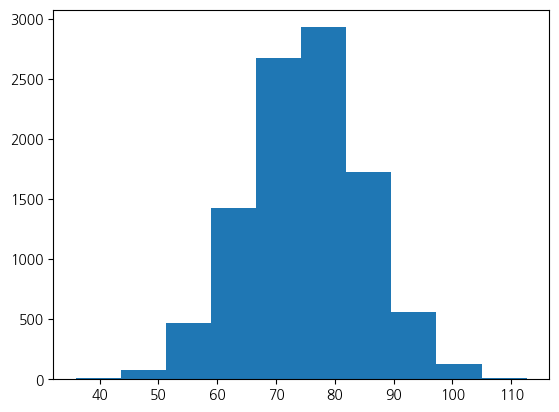

In [47]:
plt.hist(df.recent_learning_achievement)

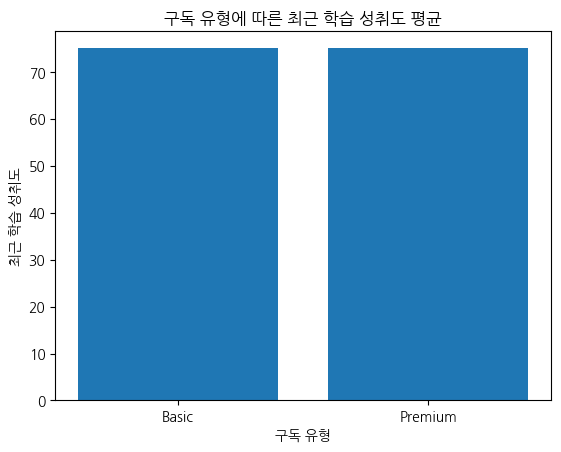

In [52]:
plt.bar(df.subscription_type,df["recent_learning_achievement"].mean())
plt.title('구독 유형에 따른 최근 학습 성취도 평균')
plt.xlabel('구독 유형')
plt.ylabel('최근 학습 성취도')

plt.show()

In [49]:
df.groupby("subscription_type")["recent_learning_achievement"].mean()

subscription_type
Basic      75.086845
Premium    74.944263
Name: recent_learning_achievement, dtype: float64

### 3. 프리미엄 구독자가 구독을 연장할 것이다.

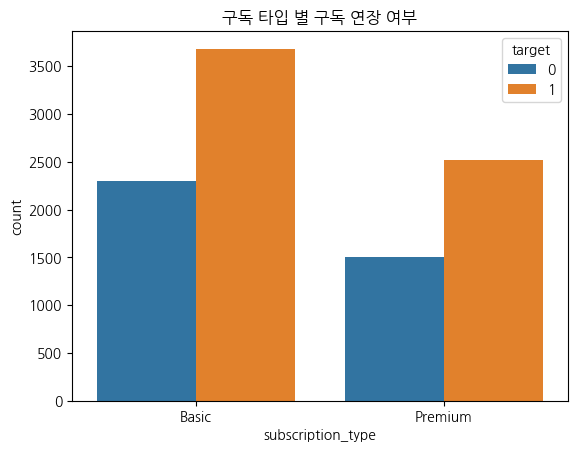

In [54]:
sns.countplot(x="subscription_type", hue="target", data=df)
plt.title("구독 타입 별 구독 연장 여부")
plt.show()

In [55]:
df.groupby("subscription_type")["target"].count()

subscription_type
Basic      5979
Premium    4021
Name: target, dtype: int64

In [62]:
output = dict(list(df.groupby(['subscription_type', 'target'])))
Basic_1 = output[('Basic',1)]
Basic_0= output[('Basic',0)]
Premium_1 = output[('Premium',1)]
Premium_0 = output[('Premium',0)]

In [69]:
len(Basic_1)

3683

In [70]:
len(Basic_0)

2296

In [71]:
len(Premium_1)

2516

In [72]:
len(Premium_1)

1505

In [74]:
basic = len(Basic_1)/(len(Basic_1)+len(Basic_0))*100
premium = len(Premium_1)/(len(Premium_1)+len(Premium_0))*100
print(round(basic),round(premium))

62 63


### 4. 학습 코스가 중간정도 진행된 사람

In [129]:
completed_courses = df.groupby('total_completed_courses')['user_id'].count()
completed_courses

total_completed_courses
1        1
2       10
3       23
4       60
5      155
6      238
7      442
8      599
9      806
10     944
11    1064
12    1105
13    1023
14     936
15     783
16     563
17     471
18     326
19     190
20     115
21      62
22      30
23      27
24      12
25       7
26       5
27       3
Name: user_id, dtype: int64

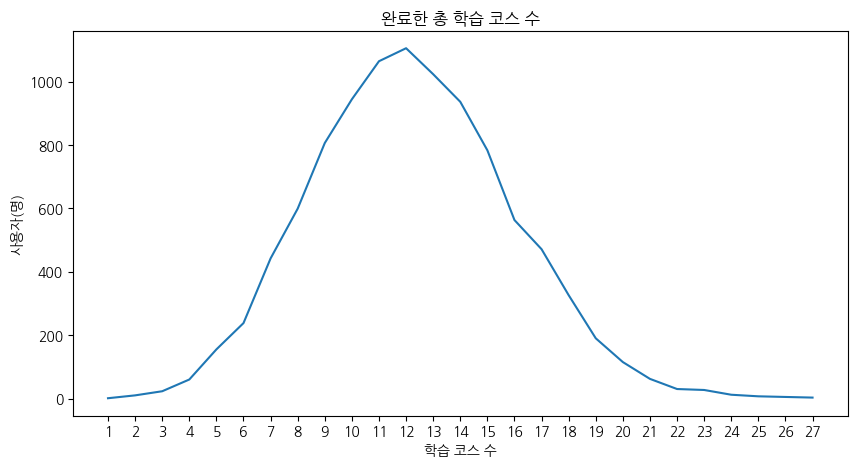

In [77]:
plt.figure(figsize=(10,5))

plt.plot(completed_courses.index, completed_courses.values)

plt.title('완료한 총 학습 코스 수')

plt.xlabel('학습 코스 수')

plt.ylabel('사용자(명)')

plt.xticks(np.arange(1, 28))

plt.show()

In [93]:
courses = df[(df['total_completed_courses']>=10)&(df['total_completed_courses']<19)]
courses

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,1d959e91,7,29,16,84.130016,14,14,78.348380,4,5,Low,Premium,1,6,1
9995,ae6b76bc,22,29,14,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9997,e4622a54,7,27,18,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


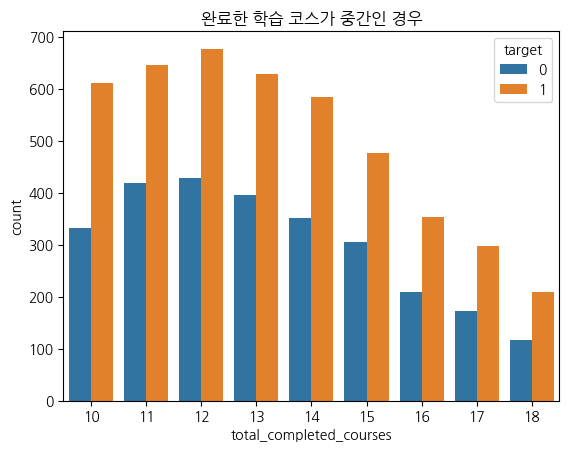

In [115]:
sns.countplot(x='total_completed_courses', hue="target", data=courses)
plt.title("완료한 학습 코스가 중간인 경우")
plt.show()

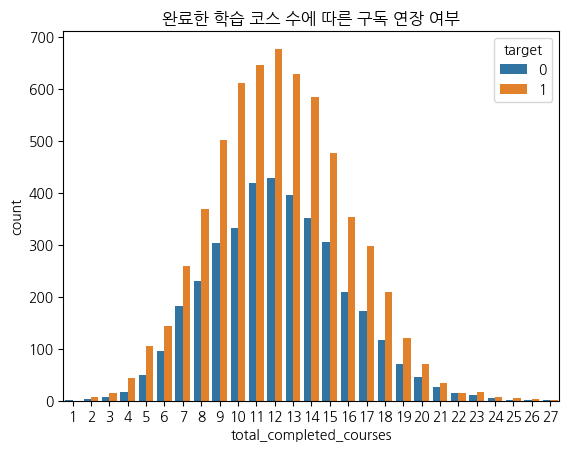

In [116]:
sns.countplot(x='total_completed_courses', hue="target", data=df)
plt.title("완료한 학습 코스 수에 따른 구독 연장 여부")
plt.show()

In [98]:
course1 = df[(df['total_completed_courses']>=10)&(df['total_completed_courses']<19)&(df['target']==1)]
course2 = df[(df['total_completed_courses']>=10)&(df['total_completed_courses']<19)&(df['target']==0)]
course3 = df[(df['total_completed_courses']>=19)|(df['total_completed_courses']<10)&(df['target']==1)]
course4 = df[(df['total_completed_courses']>=19)|(df['total_completed_courses']<10)&(df['target']==0)]

In [99]:
course3

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
8,9e6713d2,20,4,12,37.384210,8,8,63.624395,4,4,High,Basic,0,0,1
18,61bf854a,18,19,18,8.389999,20,8,65.806160,3,5,Medium,Basic,1,0,1
19,c8d9c81f,6,16,14,5.838557,23,21,73.921745,1,5,Low,Basic,4,0,1
25,fc660a6e,17,29,20,14.931054,1,6,44.727997,1,3,High,Basic,1,6,1
30,8211b1ee,1,19,7,24.744909,17,9,79.611846,3,5,High,Basic,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,3c87381d,7,6,10,53.166318,11,21,73.358599,0,5,Low,Premium,4,2,1
9985,8fcca29a,11,15,16,26.838931,21,6,72.500642,1,5,Medium,Basic,4,1,1
9991,6ab018ed,12,25,12,58.407028,2,8,64.614196,1,3,High,Basic,3,6,1
9994,9ee4e40c,11,6,11,88.757610,6,9,77.335911,5,4,High,Basic,1,4,1


In [100]:
course_middle = len(course1)/(len(course1)+len(course2))*100
course_other = len(course3)/(len(course3)+len(course4))*100
print(round(course_middle),round(course_other))

62 59


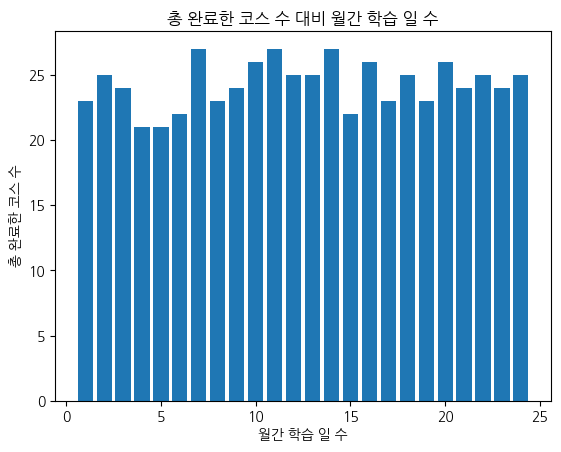

In [123]:
plt.bar(df.monthly_active_learning_days, df.total_completed_courses)
plt.title('총 완료한 코스 수 대비 월간 학습 일 수')
plt.xlabel('월간 학습 일 수')
plt.ylabel('총 완료한 코스 수')

plt.show()

### 5. 월간 학습일수가 높은 사람일 수록 서비스를 만족하여 구독 연장할 것이다.

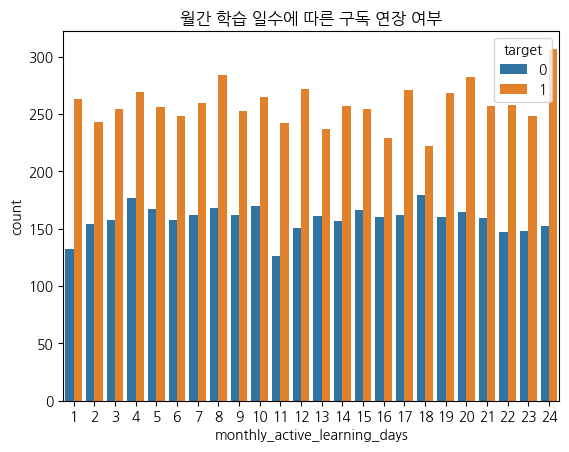

In [88]:
sns.countplot(x='monthly_active_learning_days', hue="target", data=df)
plt.title("월간 학습 일수에 따른 구독 연장 여부")
plt.show()

In [125]:
day1 = df[(df['monthly_active_learning_days']>=13)&(df['target']==1)]
day2 = df[(df['monthly_active_learning_days']>=13)&(df['target']==0)]
day3 = df[(df['monthly_active_learning_days']<13)&(df['target']==1)]
day4 = df[(df['monthly_active_learning_days']<13)&(df['target']==0)]

In [126]:
day_high = len(day1)/(len(day1)+len(day2))*100
day_low = len(day3)/(len(day3)+len(day4))*100
print(round(day_high),round(day_low))

62 62


In [127]:
(len(day1)+len(day2))

5006

In [128]:
(len(day3)+len(day4))

4994

### 6. 커뮤니티 참여도가 높을 수록 서비스 만족도가 높을 것 -> 구독 연장

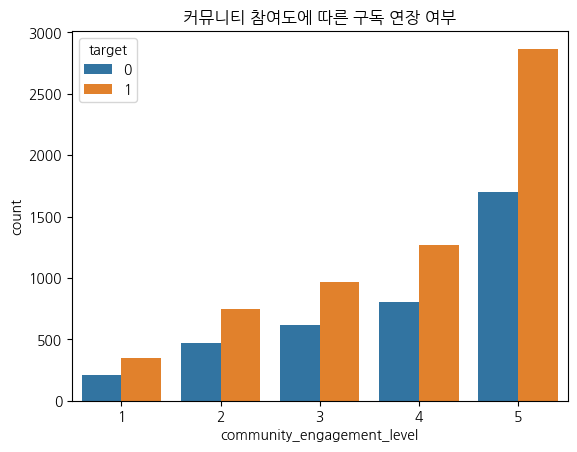

In [107]:
sns.countplot(x='community_engagement_level', hue="target", data=df)
plt.title("커뮤니티 참여도에 따른 구독 연장 여부")
plt.show()

In [108]:
level_5 = df[(df['community_engagement_level']==5)&(df['target']==1)]
level_5_0 = df[(df['community_engagement_level']==5)&(df['target']==0)]
level_4 = df[(df['community_engagement_level']==4)&(df['target']==1)]
level_4_0 = df[(df['community_engagement_level']==4)&(df['target']==0)]
level_3 = df[(df['community_engagement_level']==3)&(df['target']==1)]
level_3_0 = df[(df['community_engagement_level']==3)&(df['target']==0)]
level_2 = df[(df['community_engagement_level']==2)&(df['target']==1)]
level_2_0 = df[(df['community_engagement_level']==2)&(df['target']==0)]
level_1 = df[(df['community_engagement_level']==1)&(df['target']==1)]
level_1_0 = df[(df['community_engagement_level']==1)&(df['target']==0)]

In [113]:
level5 = len(level_5)/(len(level_5)+len(level_5_0))*100
level4 = len(level_4)/(len(level_4)+len(level_4_0))*100
level3 = len(level_3)/(len(level_3)+len(level_3_0))*100
level2 = len(level_2)/(len(level_2)+len(level_2_0))*100
level1 = len(level_1)/(len(level_1)+len(level_1_0))*100

In [114]:
print(round(level1),round(level2),round(level3),round(level4),round(level5))

62 62 61 61 63


In [120]:
df.groupby('community_engagement_level')['user_id'].count()

community_engagement_level
1     559
2    1219
3    1588
4    2070
5    4564
Name: user_id, dtype: int64